In [1]:
import jax
import jax.numpy as jnp
from consensus import *

ModuleNotFoundError: No module named 'consensus'

In [ ]:
key = jax.random.PRNGKey(0)
config = ConsensusConfig()

In [ ]:
key, subkey = jax.random.split(key)

adj_mat = generate_random_adjacency_matrix(subkey, config)

key, subkey = jax.random.split(key)


initial_state = generate_random_agent_states(subkey, config)

In [ ]:
jnp.linalg.norm(adj_mat, axis=1, keepdims=True, )

Array([[1.4142135],
       [1.4142135],
       [1.7320508],
       [1.7320508],
       [1.7320508]], dtype=float32)

In [ ]:
initial_state

Array([[-0.79141927, -0.31202483, -0.73786545,  0.6202612 , -0.6111777 ],
       [ 0.27104306,  0.65300965, -0.09737301, -0.7656326 ,  0.05701613],
       [-0.9213977 , -0.69550824,  0.69740653, -0.00249243,  0.01338029],
       ...,
       [ 0.934633  , -0.4459145 ,  0.7428684 , -0.5317199 ,  0.9887655 ],
       [ 0.5390346 , -0.48631144,  0.1265409 , -0.08987975, -0.11147618],
       [-0.900332  , -0.08470678,  0.72673416, -0.75884247,  0.8060036 ]],      dtype=float32)

In [ ]:
out = run_consensus_sim(adj_mat, initial_state, config)

In [ ]:
outputs = []
from tqdm import tqdm

for i in tqdm(range(config.num_sims)):
    key, subkey = jax.random.split(key)

    adj_mat = generate_random_adjacency_matrix(subkey, config)

    key, subkey = jax.random.split(key)

    initial_state = generate_random_agent_states(subkey, config)

    trajectories = run_consensus_sim(adj_mat, initial_state, config)

    outputs.append(trajectories)



100%|██████████| 500/500 [00:01<00:00, 356.10it/s]


In [ ]:
len(outputs)

500

In [ ]:
x = outputs[1]

In [ ]:
x

Array([[[-1.66636720e-01,  5.12272954e-01, -7.18595386e-01,
         -6.62203312e-01,  5.40143251e-01],
        [-1.74384415e-01,  4.56314355e-01, -6.64573908e-01,
         -6.39672816e-01,  5.08012652e-01],
        [-1.80595487e-01,  4.05365229e-01, -6.15751922e-01,
         -6.18524671e-01,  4.76983011e-01],
        ...,
        [-1.59010112e-01, -1.50679022e-01, -1.53786018e-01,
         -1.67208239e-01, -1.54014796e-01],
        [-1.58967257e-01, -1.50819257e-01, -1.53847516e-01,
         -1.66839033e-01, -1.54245734e-01],
        [-1.58922747e-01, -1.50957853e-01, -1.53907120e-01,
         -1.66481182e-01, -1.54461235e-01]],

       [[-2.95487672e-01,  2.00281173e-01,  7.41982460e-01,
         -6.08857512e-01, -5.24303138e-01],
        [-2.84227967e-01,  2.24914923e-01,  6.94133639e-01,
         -5.94611228e-01, -5.13903916e-01],
        [-2.74258196e-01,  2.46254981e-01,  6.50272310e-01,
         -5.80505908e-01, -5.03451347e-01],
        ...,
        [-9.05691609e-02,  2.4682218

In [ ]:
x.shape

(500, 100, 5)

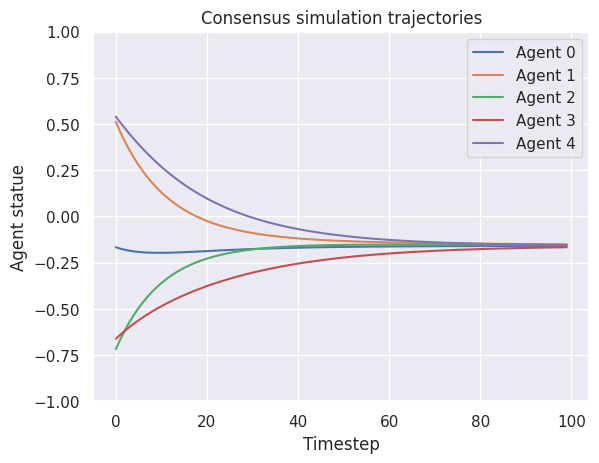

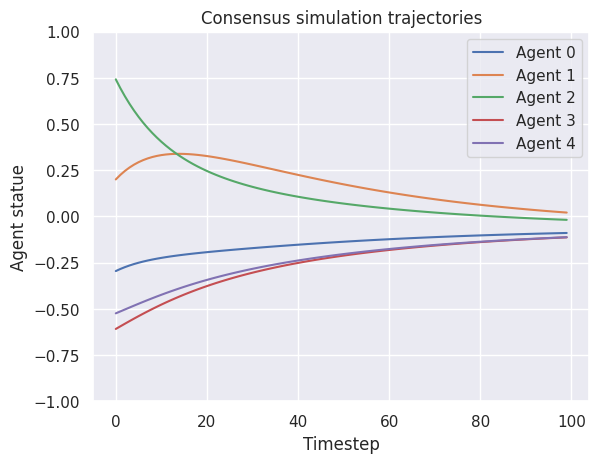

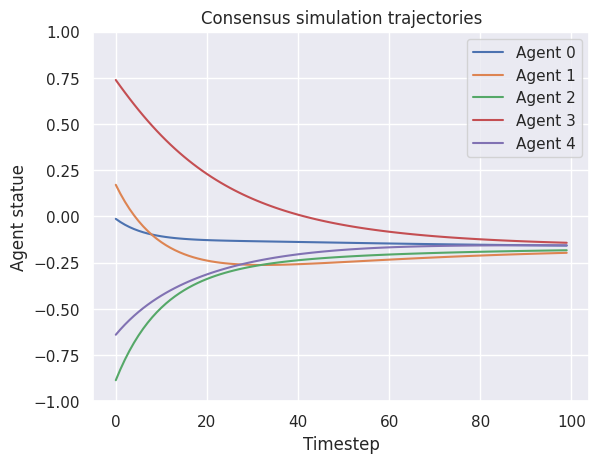

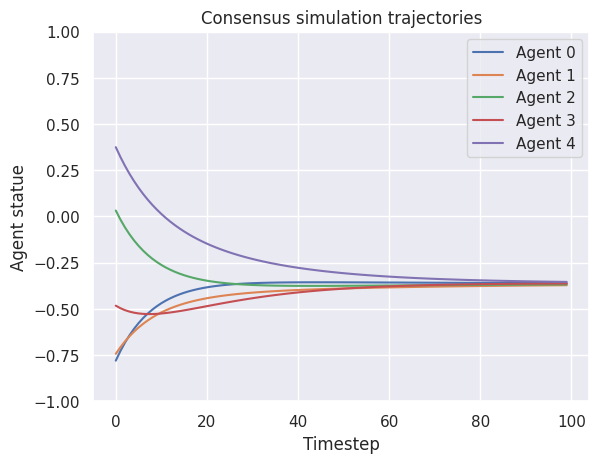

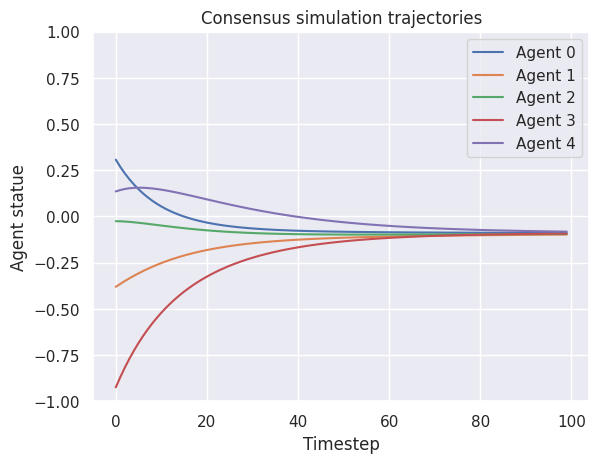

In [ ]:
for i in range(5):
    plot_consensus(x[i], config)

In [ ]:
s = initial_state[0]
s

Array([ 0.88282514,  0.4825251 , -0.07153511,  0.03161097,  0.97659564],      dtype=float32)

In [ ]:
s[jnp.newaxis, :] - s[:, jnp.newaxis]

Array([[ 0.        , -0.40030003, -0.95436025, -0.8512142 ,  0.0937705 ],
       [ 0.40030003,  0.        , -0.5540602 , -0.45091414,  0.49407053],
       [ 0.95436025,  0.5540602 ,  0.        ,  0.10314608,  1.0481308 ],
       [ 0.8512142 ,  0.45091414, -0.10314608,  0.        ,  0.9449847 ],
       [-0.0937705 , -0.49407053, -1.0481308 , -0.9449847 ,  0.        ]],      dtype=float32)

In [ ]:
jnp.sum(adj_mat, axis=1)

Array([3, 3, 3, 4, 2], dtype=int32)

Running Kuramoto simulation for 10000 steps...
Simulation complete.

--- Analysis Results ---
Initial Coherence R(0): 0.1514
Final Coherence   R(T): 0.8072

Natural Frequencies (ω):
[-0.7398006  -0.604128   -0.20279019  0.44994825 -0.46915287]

Mean Frequencies over Simulation:
[-0.73979986 -0.22966443 -0.196503   -0.18220069 -0.21775451]


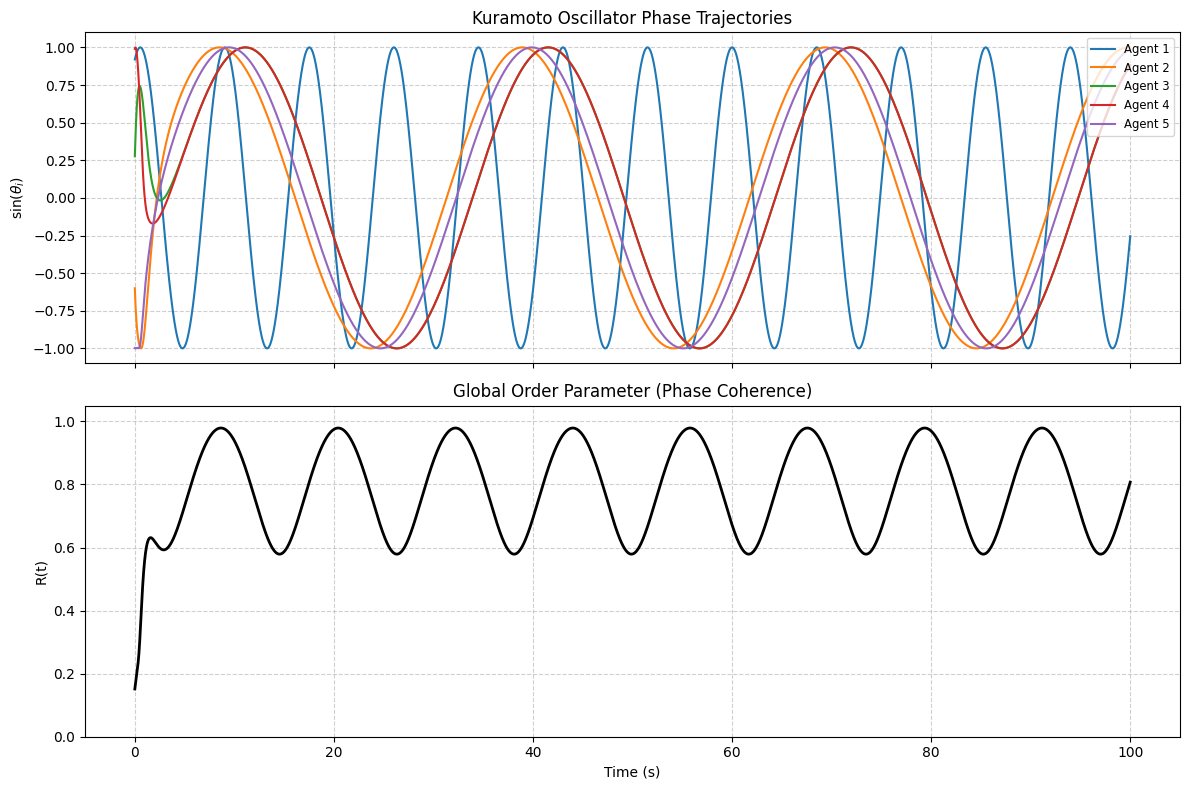

In [ ]:
from kuramoto import *
config = KuramotoConfig(num_agents=5, coupling=2, dt=0.01, T=100)
key = jax.random.PRNGKey(42)
key, adj_key, state_key = jax.random.split(key, 3)

# 2. Generate system components
adj_matrix = generate_random_adjacency_matrix(adj_key, config)
thetas0, omegas = generate_initial_state(state_key, config)

# 3. Run the simulation
print(f"Running Kuramoto simulation for {config.num_time_steps} steps...")
trajectory = run_kuramoto_simulation(thetas0, omegas, adj_matrix, config)
# Block until the computation is done to measure time accurately if needed
trajectory.block_until_ready()
print("Simulation complete.")

# 4. Analyze the results
R_over_time = phase_coherence(trajectory)
avg_frequencies = mean_frequency(trajectory, omegas, adj_matrix, config)

print("\n--- Analysis Results ---")
print(f"Initial Coherence R(0): {R_over_time[0]:.4f}")
print(f"Final Coherence   R(T): {R_over_time[-1]:.4f}")
print("\nNatural Frequencies (ω):")
print(np.asarray(omegas))
print("\nMean Frequencies over Simulation:")
print(np.asarray(avg_frequencies))

# 5. Plot the results
plot_kuramoto_results(np.asarray(trajectory), np.asarray(R_over_time), config)

In [ ]:
adj_matrix

Array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1.]], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

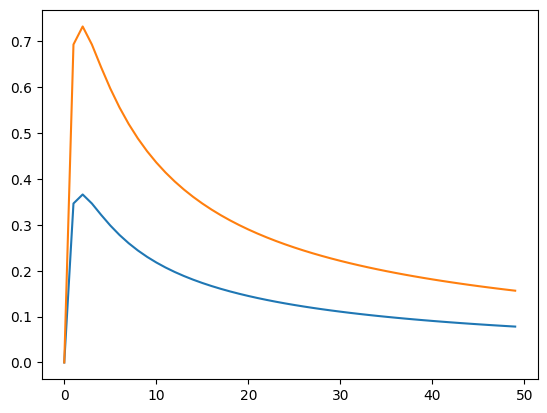

In [ ]:
x = [i for i in range(50)]
y = [np.log(i+1)/(i+1) for i in x]
y2 = [2*np.log(i+1)/(i+1) for i in x]

plt.plot(x,  y)
plt.plot(x, y2)


In [ ]:
import sims

In [ ]:
sims.consensus_config


{'num_sims': 500,
 'num_agents': 5,
 'max_range': 1,
 'step_size': 0.1,
 'directed': False,
 'weighted': False,
 'num_time_steps': 100}

100%|██████████| 10/10 [01:51<00:00, 11.18s/it]

-5.0


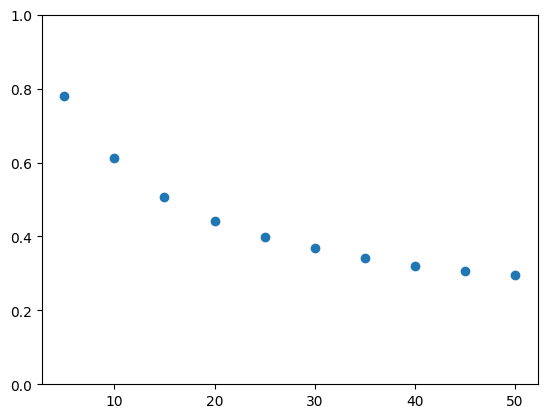

100%|██████████| 10/10 [01:52<00:00, 11.23s/it]

-4.5


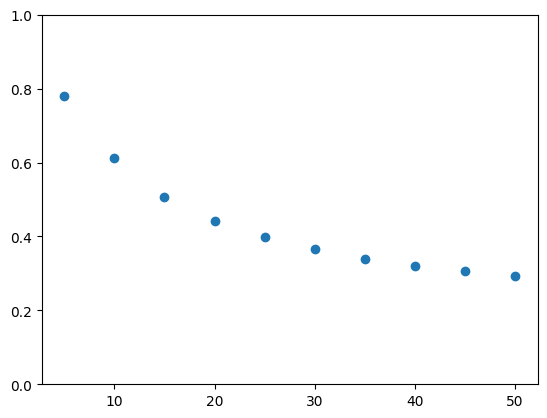

100%|██████████| 10/10 [01:52<00:00, 11.29s/it]

-4.0


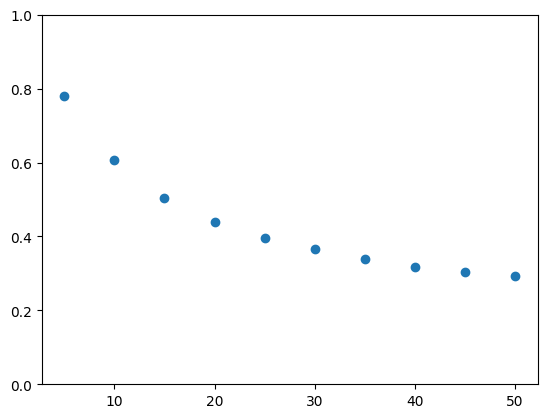

100%|██████████| 10/10 [01:51<00:00, 11.18s/it]

-3.5


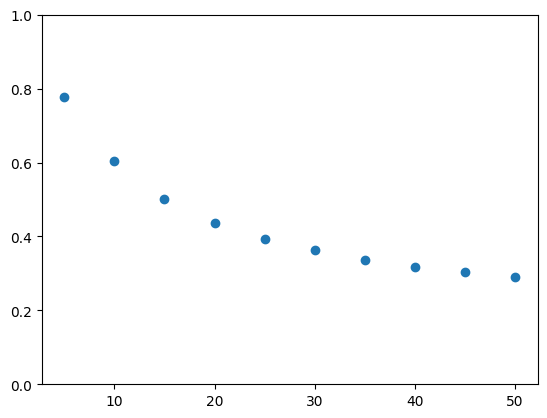

100%|██████████| 10/10 [01:51<00:00, 11.20s/it]

-3.0


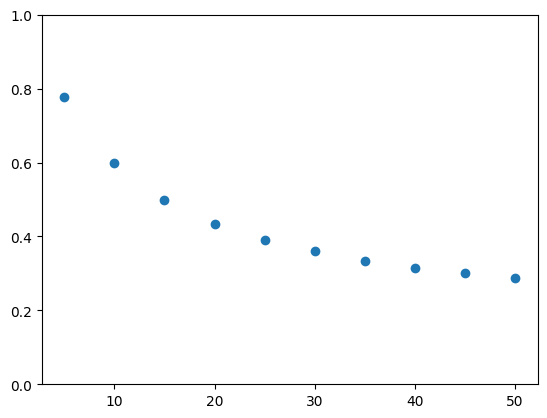

100%|██████████| 10/10 [01:52<00:00, 11.20s/it]

-2.5


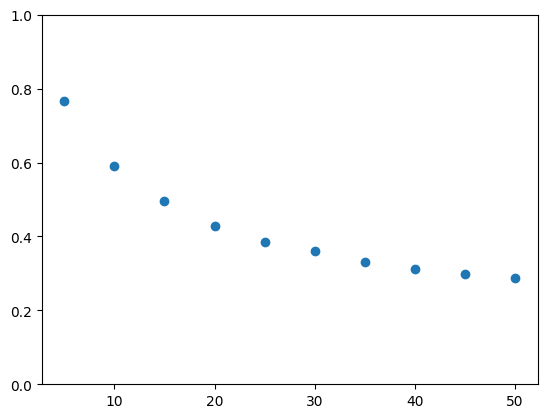

100%|██████████| 10/10 [01:51<00:00, 11.16s/it]

-2.0


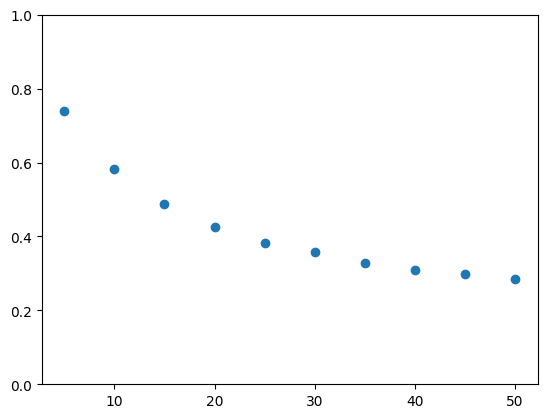

100%|██████████| 10/10 [01:51<00:00, 11.12s/it]

-1.5


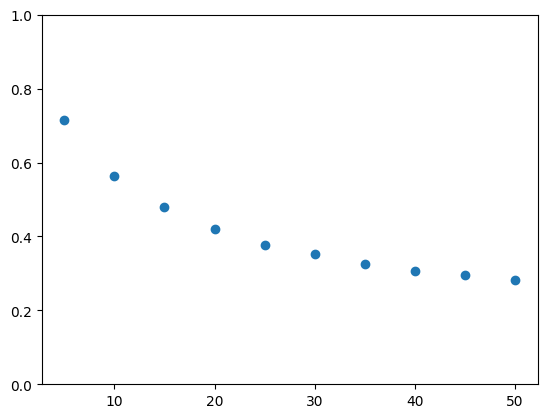

100%|██████████| 10/10 [01:51<00:00, 11.14s/it]

-1.0


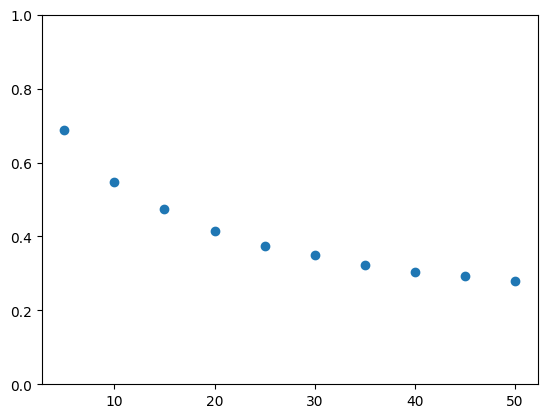

100%|██████████| 10/10 [01:51<00:00, 11.10s/it]

-0.5


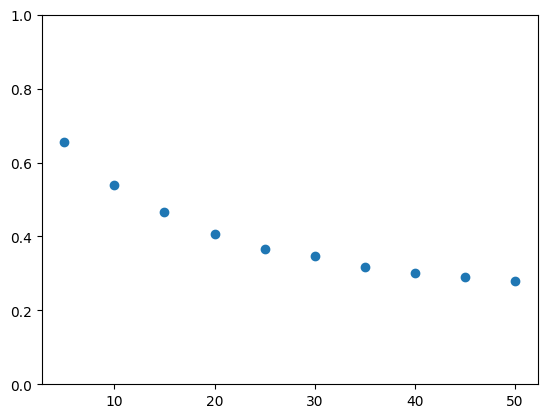

100%|██████████| 10/10 [01:51<00:00, 11.12s/it]

0.0


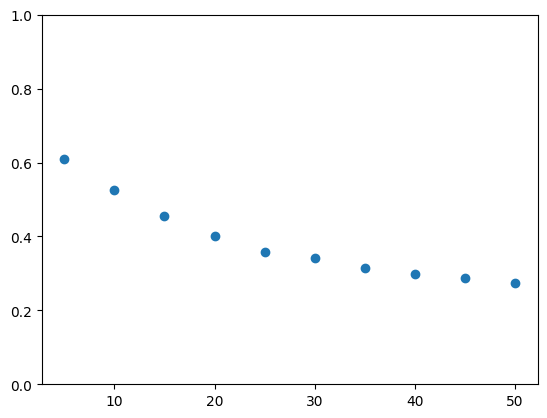

100%|██████████| 10/10 [01:51<00:00, 11.11s/it]

0.5


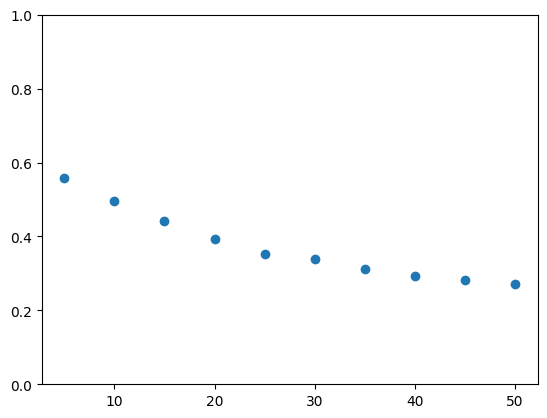

In [ ]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from config_ import ModelConfig
from train_and_eval import calculate_f1_score
from sklearn.metrics import f1_score


data_dir = "datasets/consensus_dataset"

for THRESHOLD in np.arange(-5, 1, 0.5):
    datapoints = {}
    

    for folder in tqdm(os.listdir(data_dir)):
        num_agents = int(folder.split("_")[1]) # Extract num agents
        
        folder_path = os.path.join(data_dir, folder)

        # Load model config from summary json
        with open(os.path.join(folder_path, "results/NoiseType.NONE", "0.01", "summary_results.json"), "r") as f:
            summary_results = json.load(f)

        
        for i, graph in enumerate(os.listdir(folder_path)):

            # train_summary_results
            summ_results = summary_results[i-1]

            if graph == "results": # ignore the result folder
                continue

            graph_path = os.path.join(folder_path, graph)

            # Load run data
            with open(os.path.join(folder_path, graph), "r") as f:
                run_data = json.load(f)

            true_graph = np.array(run_data["adjacency_matrix"])
            
            learned_graph = np.array(summ_results["raw_attention"])

            predicted_graph = (learned_graph > THRESHOLD).astype(int)

            true_flat = true_graph.flatten()
            pred_flat = predicted_graph.flatten()
            
            calc_f1_score = f1_score(true_flat, pred_flat)


            datapoints[num_agents] = datapoints.get(num_agents, [])
            datapoints[num_agents].append(calc_f1_score)


    for key in datapoints.keys():
        datapoints[key] = sum(datapoints[key])/len(datapoints[key])


    x = []
    y = []

    for item in datapoints.items():
        x.append(item[0])
        y.append(item[1])

    print(THRESHOLD)
    plt.ylim(0, 1)
    plt.scatter(x, y)
    plt.show()         

        

100%|██████████| 10/10 [00:01<00:00,  6.23it/s]


-0.4


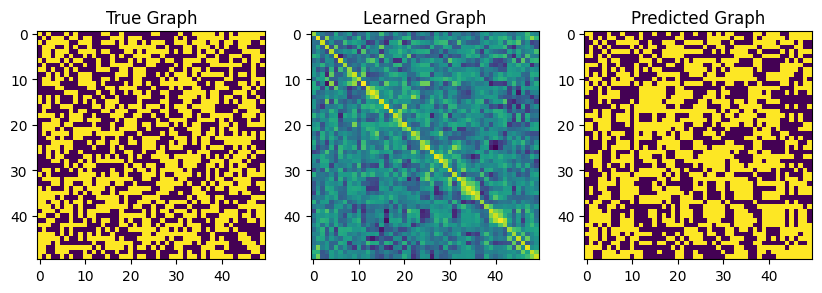

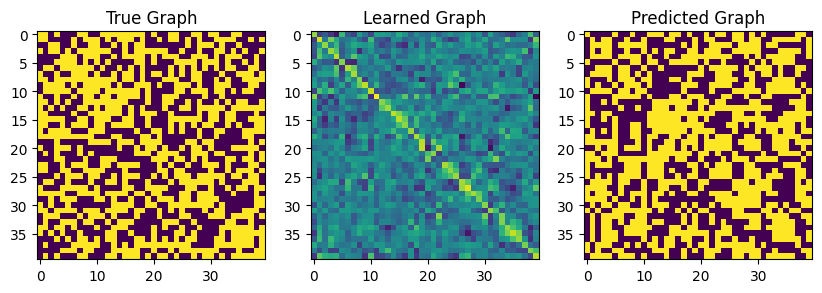

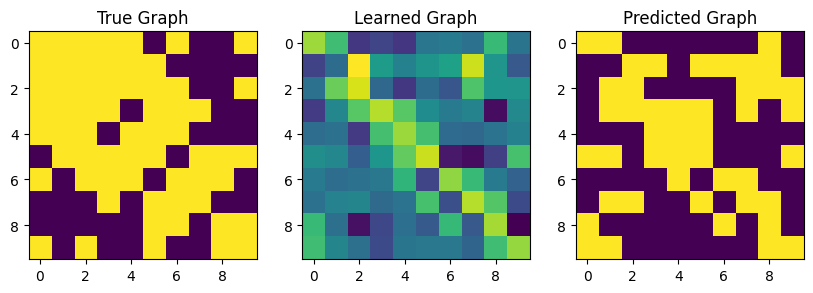

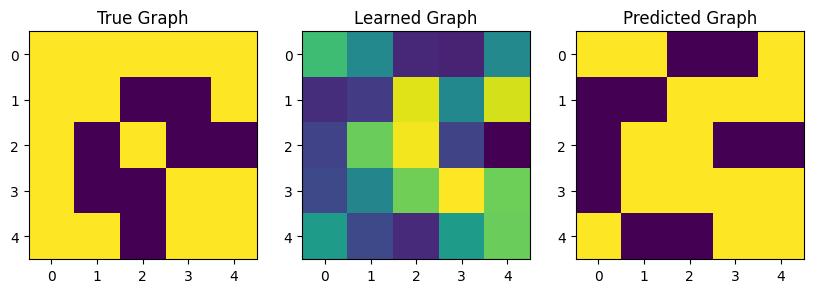

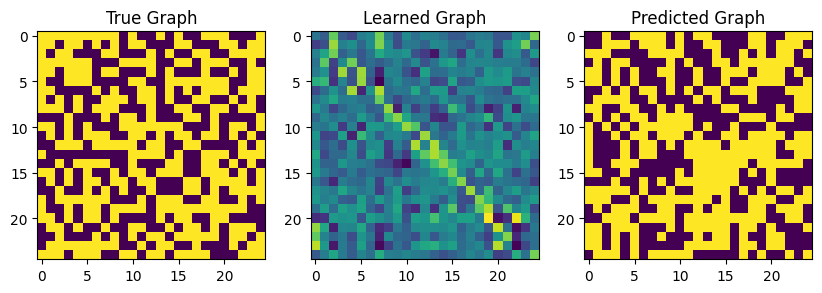

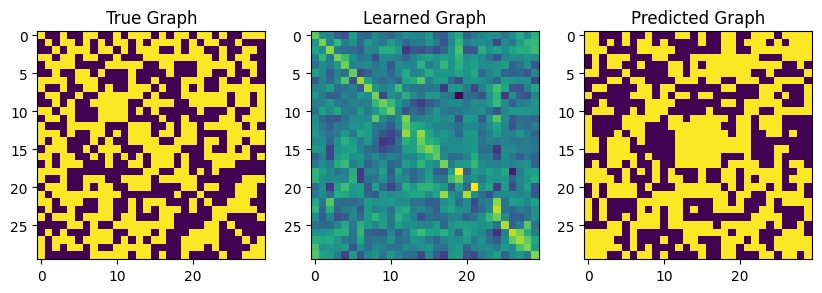

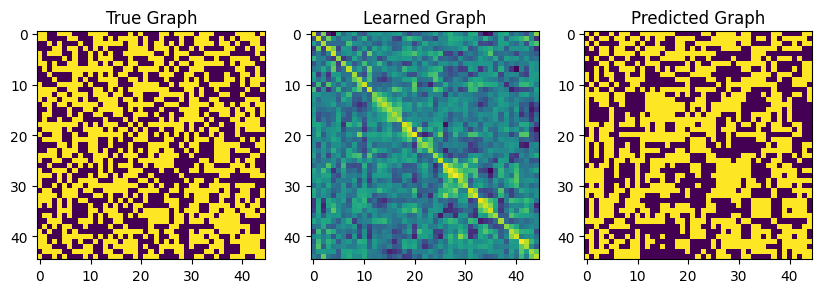

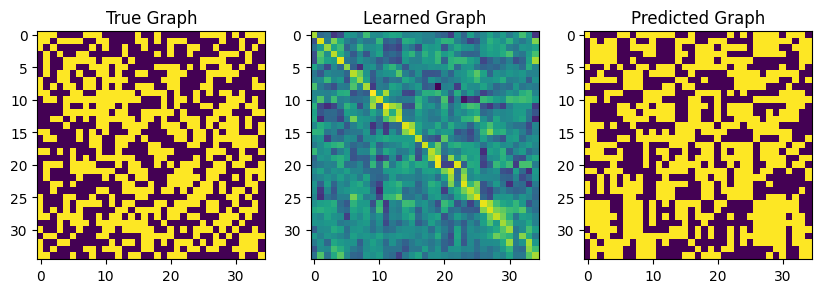

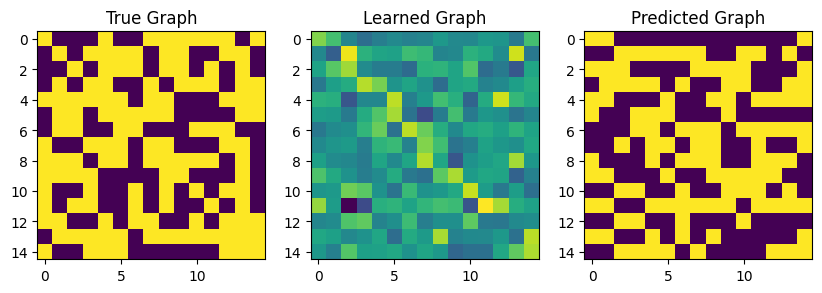

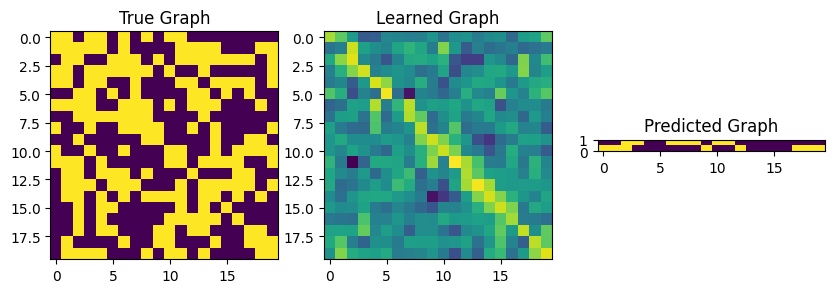

In [8]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from config_ import ModelConfig
from train_and_eval import calculate_f1_score
from sklearn.metrics import f1_score


data_dir = "datasets/consensus_dataset"

THRESHOLD = -0.4
datapoints = {}


for folder in tqdm(os.listdir(data_dir)):
    num_agents = int(folder.split("_")[1]) # Extract num agents
    
    folder_path = os.path.join(data_dir, folder)

    # Load model config from summary json
    with open(os.path.join(folder_path, "results/NoiseType.NONE", "0.01", "summary_results.json"), "r") as f:
        summary_results = json.load(f)

    
    for i, graph in enumerate(os.listdir(folder_path)):

        # train_summary_results
        summ_results = summary_results[i-1]

        if graph == "results": # ignore the result folder
            continue

        graph_path = os.path.join(folder_path, graph)

        # Load run data
        with open(os.path.join(folder_path, graph), "r") as f:
            run_data = json.load(f)

        true_graph = np.array(run_data["adjacency_matrix"])
        
        learned_graph = np.array(summ_results["raw_attention"])

        predicted_graph = (learned_graph > THRESHOLD).astype(int)

        fig, ax = plt.subplots(1,3, figsize=(10, 8))

        ax[0].imshow(true_graph)
        ax[0].set_title("True Graph")
        ax[1].imshow(learned_graph)
        ax[1].set_title("Learned Graph")
        ax[2].imshow(predicted_graph)
        ax[2].set_title("Predicted Graph")

        break


for key in datapoints.keys():
    datapoints[key] = sum(datapoints[key])/len(datapoints[key])


x = []
y = []

for item in datapoints.items():
    x.append(item[0])
    y.append(item[1])

print(THRESHOLD)
plt.ylim(0, 1)
plt.scatter(x, y)
plt.show()         

        

In [22]:
from train_and_eval import *

train_config = TrainConfig()
train_config.epochs = 10_000
train_config.f1_threshold = -2
train_config.data_directory = "datasets/consensus_dataset"

print(f"Starting training pipeline for '{train_config.data_directory}' data.")

# Get sorted list of agent directories
agent_dirs = sorted(
    [d for d in os.listdir(train_config.data_directory) if d.startswith("agents_")],
    key=lambda x: int(x.split('_')[1])
)

starter_key = jax.random.PRNGKey(49)
agent_dir_name = agent_dirs[0]
agent_dir_path = os.path.join(train_config.data_directory, agent_dir_name)

all_results_for_agent = []

graph_files = sorted([f for f in os.listdir(agent_dir_path) if f.endswith(".json")])

results_dir = os.path.join(agent_dir_path, "results")
os.makedirs(results_dir, exist_ok=True)

subdir = str(train_config.noise_type)
subsubdir = str(train_config.noise_level)
sub_results_dir = os.path.join(results_dir, subdir, subsubdir)
os.makedirs(sub_results_dir, exist_ok=True)

print(f"\nProcessing {len(graph_files)} graphs for {agent_dir_name}...")
graph_file_name = graph_files[0]
file_path = os.path.join(agent_dir_path, graph_file_name)

with open(file_path, 'r') as f:
    data = json.load(f)

# 1. Load and Prepare Data
trajectories = np.array(data['trajectories'])*10
s, l, n = trajectories.shape
# trajectories = trajectories.T
# np.random.shuffle(trajectories)
# trajectories = np.random.shuffle(trajectories)
true_graph = np.array(data['adjacency_matrix'])
starter_key, data_key = jax.random.split(starter_key)
inputs, targets = prepare_data_for_model(data_key, trajectories, train_config, train_config.batch_size)

# 2. Configure Model
num_agents = trajectories.shape[-1]
model_config = ModelConfig(
)

model_config.num_agents=num_agents
model_config.input_dim=1 # Each agent has a single state value at time t
model_config.output_dim=1
model_config.embedding_dim=32 

# 3. Train the Model
# This relies on the modified train_model that returns final params
final_params, train_logs = train_model(
    config=model_config,
    inputs=inputs,
    targets=targets,
    true_graph=true_graph,
    train_config=train_config
)

# 4. Evaluate
f1 = calculate_f1_score(
    final_params, 
    model_config, 
    true_graph, 
    train_config.f1_threshold
)

loss_history_serializable = {
    epoch: [loss.item() for loss in losses] 
    for epoch, losses in train_logs['loss_history'].items()
}


print(f1)

Starting training pipeline for 'datasets/consensus_dataset' data.

Processing 100 graphs for agents_5...
0.8571428571428571


In [ ]:
data

KeyError: 0